In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
df = pd.read_csv("telemedicine-journal-publications.csv")
df.head()

,AU,DE,ID,C1,CR,JI,AB,AR,coden,RP,...,DB,TI,url,VL,PY,AU_UN,AU1_UN,AU_UN_NR,SR_FULL,SR
0,VARSHNEY U,NaN,MOBILE DEVICES; MOBILE TELEMEDICINE; DATA PRO...,"DEPT. OF COMP. INFORMATION SYSTEMS, GEORGIA ST...",NaN,COMPUTER,THE USE OF THE WIRELESS COMMUNICATION TECHNOLO...,NaN,CPTRB,"VARSHNEY, U.; DEPT. OF COMP. INFORMATION SYSTE...",...,SCOPUS,PERVASIVE HEALTHCARE,https://www.scopus.com/inward/record.uri?eid=2...,36.0,2003,GEORGIA STATE UNIVERSITY,NOTREPORTED;GEORGIA STATE UNIVERSITY;NOTREPORTED,NaN,"VARSHNEY U, 2003, COMPUTER","VARSHNEY U, 2003, COMPUTER"
1,SURANA S;PATRA R;NEDEVSCHI S;BREWER E,INFORMATION AND COMMUNICATION TECHNOLOGIES; T...,NaN,ELECTRICAL ENGINEERING AND COMPUTER SCIENCES (...,"BREWER, E., THE CASE FOR TECHNOLOGY IN DEVELOP...",COMPUTER,A NOVEL ICT PROJECT IN RURAL INDIA USES LONG-D...,NaN,CPTRB,"SURANA, S.; ELECTRICAL ENGINEERING AND COMPUTE...",...,SCOPUS,DEPLOYING A RURAL WIRELESS TELEMEDICINE SYSTEM...,https://www.scopus.com/inward/record.uri?eid=2...,41.0,2008,UNIVERSITY OF CALIFORNIA;INTEL RESEARCH BERKELEY,NOTREPORTED;UNIVERSITY OF CALIFORNIA;NOTREPORTED,NaN,"SURANA S, 2008, COMPUTER","SURANA S, 2008, COMPUTER"
2,HAZEN ME,BIOTELEMETRIC DATA; BODY NETWORK SENSORS; HE...,NaN,INTELLON,NaN,COMPUTER,SERVICE PROVIDERS CAN USE POWERLINE COMMUNICAT...,NaN,CPTRB,"HAZEN, M.E.; INTELLONEMAIL: MARK.HAZEN@INTELLO...",...,SCOPUS,THE TECHNOLOGY BEHIND HOMEPLUG AV POWERLINE CO...,https://www.scopus.com/inward/record.uri?eid=2...,41.0,2008,NaN,NOTREPORTED;NOTREPORTED,NaN,"HAZEN ME, 2008, COMPUTER","HAZEN ME, 2008, COMPUTER"
3,SHARKEY N;SHARKEY A,COMPUTER SCIENCE AND MEDICINE; DA VINCI SURGI...,ETHICS; ROBODOC; ROBOTIC SURGERY; SURGICAL ...,"DEPARTMENTO OF AI AND ROBOTICS, UNIVERSITY OF ...","GARCIA, P., TRAUMA POD: A SEMI-AUTOMATED TELER...",COMPUTER,ROBOTIC SURGERY IS A RELATIVELY NEW TECHNOLOGY...,6374197.0,CPTRB,"SHARKEY, N.; DEPARTMENTO OF AI AND ROBOTICS, U...",...,SCOPUS,ROBOTIC SURGERY: ON THE CUTTING EDGE OF ETHICS,https://www.scopus.com/inward/record.uri?eid=2...,46.0,2013,UNIVERSITY OF SHEFFIELD;UNIVERSITY OF SHEFFIELD,NOTREPORTED;UNIVERSITY OF SHEFFIELDUNITED KING...,NaN,"SHARKEY N, 2013, COMPUTER","SHARKEY N, 2013, COMPUTER"
4,BARRETT D,LONG-TERM CONDITIONS; REMOTE MONITORING; TEL...,AGED; AMBULATORY MONITORING; ARTICLE; CHRON...,"FACULTY OF HEALTH AND SOCIAL CARE, UNIVERSITY ...","ABRAHAM, W., ADAMSON, P., BOURGE, R., WIRELESS...",NURS. OLDER PEOPLE,LONG-TERM CONDITIONS HAVE A NEGATIVE EFFECT ON...,NaN,NaN,"BARRETT, D.; FACULTY OF HEALTH AND SOCIAL CARE...",...,SCOPUS,THE ROLE OF TELEMONITORING IN CARING FOR OLDER...,https://www.scopus.com/inward/record.uri?eid=2...,24.0,2012,UNIVERSITY OF HULL,NOTREPORTED;UNIVERSITY OF HULLUNITED KINGDOM;N...,NaN,"BARRETT D, 2012, NURS OLDER PEOPLE","BARRETT D, 2012, NURS OLDER PEOPLE"


In [6]:
df = df.rename(columns={"AU": "Author", "DE": "Department", "TI": "Title", "PY": "Publication Year", "C1": "Correspondence Address", "JI": "Journal", "VL": "Volume", "DB": "Source", "AB": "Abstract", "AU_UN": "Affiliation", "ID": "Keywords"})
def caps_title(x):
    if type(x) is str:
        return x.title()
    return x

df = df.applymap(caps_title)

In [7]:
df.head()

,Author,Department,Keywords,Correspondence Address,CR,Journal,Abstract,AR,coden,RP,...,Source,Title,url,Volume,Publication Year,Affiliation,AU1_UN,AU_UN_NR,SR_FULL,SR
0,Varshney U,NaN,Mobile Devices; Mobile Telemedicine; Data Pro...,"Dept. Of Comp. Information Systems, Georgia St...",NaN,Computer,The Use Of The Wireless Communication Technolo...,NaN,Cptrb,"Varshney, U.; Dept. Of Comp. Information Syste...",...,Scopus,Pervasive Healthcare,Https://Www.Scopus.Com/Inward/Record.Uri?Eid=2...,36.0,2003,Georgia State University,Notreported;Georgia State University;Notreported,NaN,"Varshney U, 2003, Computer","Varshney U, 2003, Computer"
1,Surana S;Patra R;Nedevschi S;Brewer E,Information And Communication Technologies; T...,NaN,Electrical Engineering And Computer Sciences (...,"Brewer, E., The Case For Technology In Develop...",Computer,A Novel Ict Project In Rural India Uses Long-D...,NaN,Cptrb,"Surana, S.; Electrical Engineering And Compute...",...,Scopus,Deploying A Rural Wireless Telemedicine System...,Https://Www.Scopus.Com/Inward/Record.Uri?Eid=2...,41.0,2008,University Of California;Intel Research Berkeley,Notreported;University Of California;Notreported,NaN,"Surana S, 2008, Computer","Surana S, 2008, Computer"
2,Hazen Me,Biotelemetric Data; Body Network Sensors; He...,NaN,Intellon,NaN,Computer,Service Providers Can Use Powerline Communicat...,NaN,Cptrb,"Hazen, M.E.; Intellonemail: Mark.Hazen@Intello...",...,Scopus,The Technology Behind Homeplug Av Powerline Co...,Https://Www.Scopus.Com/Inward/Record.Uri?Eid=2...,41.0,2008,NaN,Notreported;Notreported,NaN,"Hazen Me, 2008, Computer","Hazen Me, 2008, Computer"
3,Sharkey N;Sharkey A,Computer Science And Medicine; Da Vinci Surgi...,Ethics; Robodoc; Robotic Surgery; Surgical ...,"Departmento Of Ai And Robotics, University Of ...","Garcia, P., Trauma Pod: A Semi-Automated Teler...",Computer,Robotic Surgery Is A Relatively New Technology...,6374197.0,Cptrb,"Sharkey, N.; Departmento Of Ai And Robotics, U...",...,Scopus,Robotic Surgery: On The Cutting Edge Of Ethics,Https://Www.Scopus.Com/Inward/Record.Uri?Eid=2...,46.0,2013,University Of Sheffield;University Of Sheffield,Notreported;University Of Sheffieldunited King...,NaN,"Sharkey N, 2013, Computer","Sharkey N, 2013, Computer"
4,Barrett D,Long-Term Conditions; Remote Monitoring; Tel...,Aged; Ambulatory Monitoring; Article; Chron...,"Faculty Of Health And Social Care, University ...","Abraham, W., Adamson, P., Bourge, R., Wireless...",Nurs. Older People,Long-Term Conditions Have A Negative Effect On...,NaN,NaN,"Barrett, D.; Faculty Of Health And Social Care...",...,Scopus,The Role Of Telemonitoring In Caring For Older...,Https://Www.Scopus.Com/Inward/Record.Uri?Eid=2...,24.0,2012,University Of Hull,Notreported;University Of Hullunited Kingdom;N...,NaN,"Barrett D, 2012, Nurs Older People","Barrett D, 2012, Nurs Older People"


In [8]:
df_ft = df[["Department", "Keywords", "Journal", "Abstract", "Title", "Publication Year", "Affiliation"]]
df_ft

,Department,Keywords,Journal,Abstract,Title,Publication Year,Affiliation
0,NaN,Mobile Devices; Mobile Telemedicine; Data Pro...,Computer,The Use Of The Wireless Communication Technolo...,Pervasive Healthcare,2003,Georgia State University
1,Information And Communication Technologies; T...,NaN,Computer,A Novel Ict Project In Rural India Uses Long-D...,Deploying A Rural Wireless Telemedicine System...,2008,University Of California;Intel Research Berkeley
2,Biotelemetric Data; Body Network Sensors; He...,NaN,Computer,Service Providers Can Use Powerline Communicat...,The Technology Behind Homeplug Av Powerline Co...,2008,NaN
3,Computer Science And Medicine; Da Vinci Surgi...,Ethics; Robodoc; Robotic Surgery; Surgical ...,Computer,Robotic Surgery Is A Relatively New Technology...,Robotic Surgery: On The Cutting Edge Of Ethics,2013,University Of Sheffield;University Of Sheffield
4,Long-Term Conditions; Remote Monitoring; Tel...,Aged; Ambulatory Monitoring; Article; Chron...,Nurs. Older People,Long-Term Conditions Have A Negative Effect On...,The Role Of Telemonitoring In Caring For Older...,2012,University Of Hull
...,...,...,...,...,...,...,...
138,NaN,Asynchronous Transfer Mode; Carrier Communica...,Telephony,"Starvision Multimedia Corp., An Affiliate Of N...",New Age Solutions,1996,NaN
139,NaN,Broadband Networks; Computer Graphics; Costs...,Advanced Imaging,"The Graphics Arts Industry Creates Enormous, I...",Image Networking Now: Better Image Exchange Ac...,1996,NaN
140,NaN,Computer Software; Health Care; Imaging Syst...,Advanced Imaging,The Use Of Telemedicine As A Powerful Tool For...,Telemedicine Imaging Solutions For Remote Vide...,1996,NaN
141,NaN,Artificial Intelligence; Computer Application...,Comput Bull (London 1986),NaN,Health Computing In Scotland,1996,NaN


Text(0.5, 1.0, 'Number of Papers Published per Year')

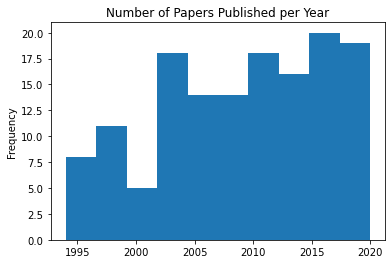

In [25]:
df_ft["Publication Year"].plot(kind="hist")
plt.title("Number of Papers Published per Year")

In [10]:
from itertools import chain

key_list = list(df_ft["Keywords"].dropna())
kw_list_split = list(chain(*[lst.split(";") for lst in key_list]))
counts_kws = pd.Series([item.strip() for item in kw_list_split]).value_counts()
counts_kws.head(50)

Telemedicine                   103
Human                           34
Article                         22
Health Care                     20
Information Technology          14
United States                   14
Humans                          14
Internet                        13
Note                            10
Telecommunication               10
Chronic Disease                  9
Sensors                          9
Patient Monitoring               8
Telecommunication Services       8
Teleconferencing                 8
Real Time Systems                8
Pharmacist                       8
Patient Treatment                8
Medical Imaging                  8
Medicine                         7
Health Care Personnel            7
Information Processing           7
Medical Applications             7
Hospitals                        7
Great Britain                    7
Drug Industry                    6
Image Quality                    6
Image Communication Systems      6
Bandwidth           

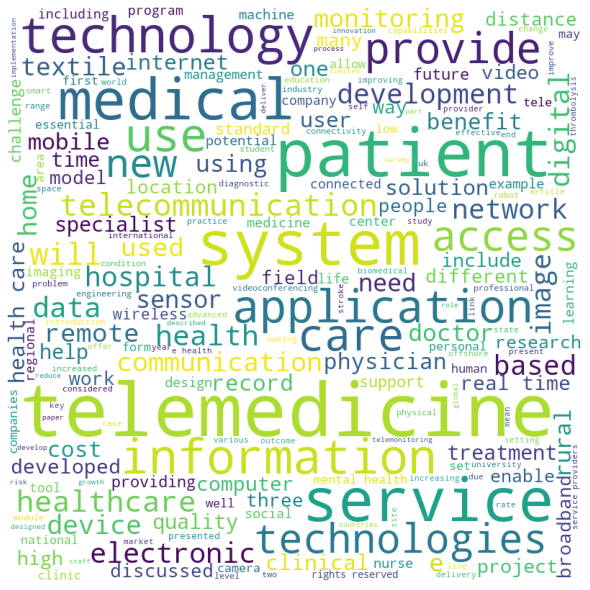

In [21]:
comment_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_ft["Abstract"].dropna():
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)):
        if tokens[i].lower() == "nan":
            continue
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

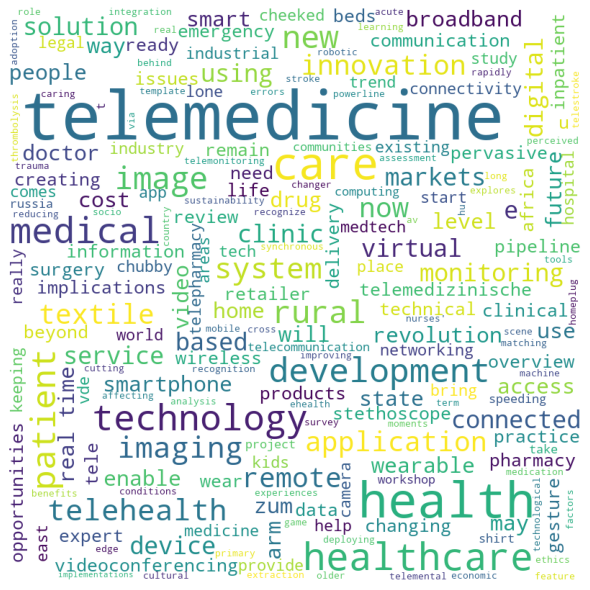

In [22]:
comment_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_ft["Title"].dropna():
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)):
        if tokens[i].lower() == "nan":
            continue
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 